# Final Project

**Problem Statement**

Develop a predictive model to accurately estimate insurance charges for individuals based on their Body Mass Index (BMI), age, sex, smoking status, and geographic region.

 **Importing the Python libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (8, 6)
sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)

## **Data Collection and Preprocessing**

### **Data Loading**

In [3]:
# Reading the CSV file and storing the data in the 'expenses_data' DataFrame
expenses_data = pd.read_csv("/Users/zanadulla/Downloads/expenses.csv")



In [4]:
# Displaying Data
expenses_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset consists of 1338 entries and 7 columns, including information on age, gender, BMI, number of children, smoking status, region, and insurance charges

### **Data Cleansing**

In [5]:
# Displaying information about the DataFrame,
# data types, non-null counts using info() funtion
expenses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no nulls in any column of the dataset, this saves a bit of time for data cleaning

In [5]:
#Exploring numerical data with describe() function
expenses_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x600 with 0 Axes>

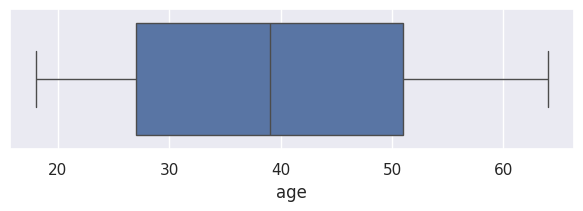

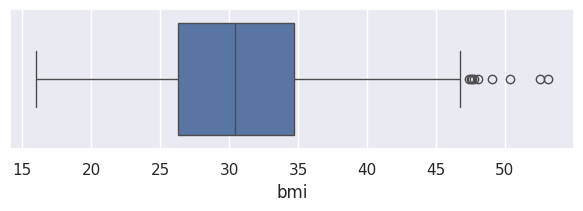

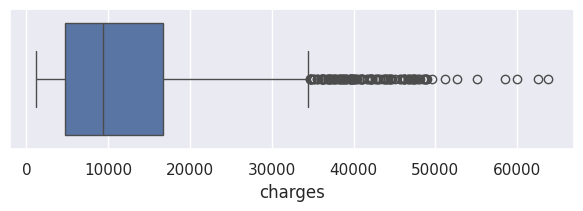

In [17]:
# List of numeric columns for which outliers will be detected
numeric_columns = ['age', 'bmi', 'charges']

# Creating subplots for each numeric column to display boxplots
plt.suptitle("Outliers Detection in Numeric Columns")

# Looping through each numeric column and creating a boxplot
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(16, 4))
    ax = plt.subplot(2, 2, i+1)

    # Using seaborn's boxplot to visualize the distribution and identify outliers
    sns.boxplot(data=expenses_data, x=col, ax=ax)

    plt.show()

> **Insight:**
>
> The dataset exhibits a diverse range of characteristics among the individuals. The ages of the individuals span from 18 to 64 years, with a median age of 39, suggesting a varied distribution across different age groups. Body Mass Index (BMI) values showcase considerable diversity, ranging from 15.96 to 53.13, with a median BMI of 30.4. This indicates variations in body compositions within the dataset. The number of children per individual ranges from 0 to 5, with a median of 1. Regarding healthcare charges, the dataset encompasses a broad spectrum, with charges ranging from 1121.87 to 63770.43. The median charge is 9382.03, highlighting the substantial variability in healthcare costs.

**There seems to be outliers in Charges, but we can keep them in dataset as those values are possible as per nature of the dataset.**

## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate analysis (distribution of each variable)**


#### **Age Distribution**

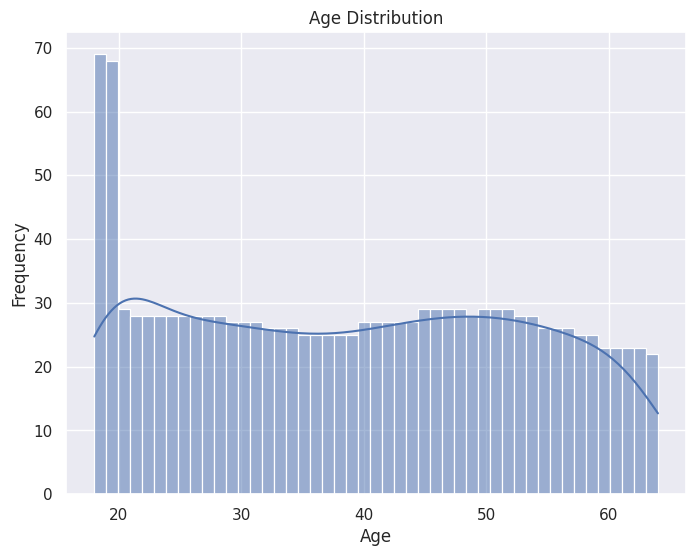

In [19]:
# Creating a histogram to visualize the distribution of 'age'
sns.histplot(expenses_data['age'], bins=len(expenses_data['age'].unique()), kde=True)

# title and labels for the plot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

> **Insight:**
>
> The age distribution almost uniform, except for a notable spike in aged 18 and 19. This unusual pattern raises the question: why is there a significant increase in customers at these ages compared to others? General explanation can be that insurance premiums tend to increase with age, reflecting higher health risks and medical costs associated with older individuals. Younger age groups are typically healthier, resulting in lower insurance payouts, which could explain the larger representation of customers at ages 18 and 19.

#### **BMI Distribution**

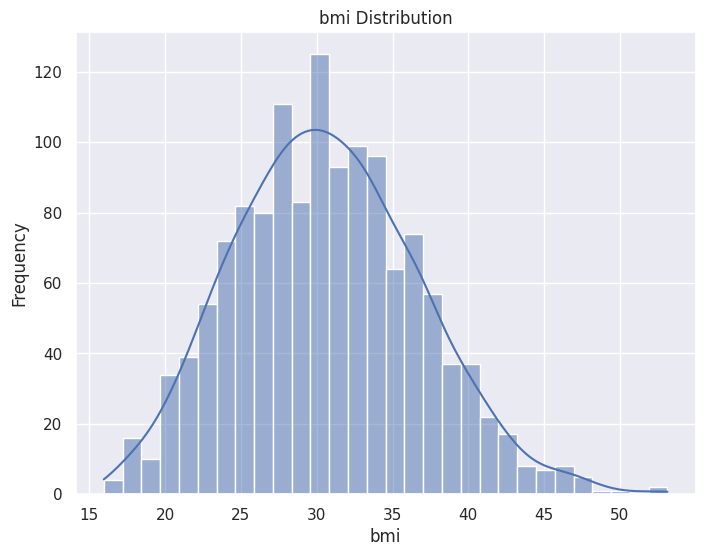

In [20]:
# Creating histogram to visualize the distribution of 'bmi' (Body Mass Index)
sns.histplot(expenses_data['bmi'], bins=30, kde=True)

# title and labels for the plot
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency')

plt.show()

> **Insight:**
>
> BMI measurements show a distribution centered around 30.
The uniform age distribution implies an even representation of customers across age groups. Individuals with extreme BMIs are less common.

#### **Charges Distribution**

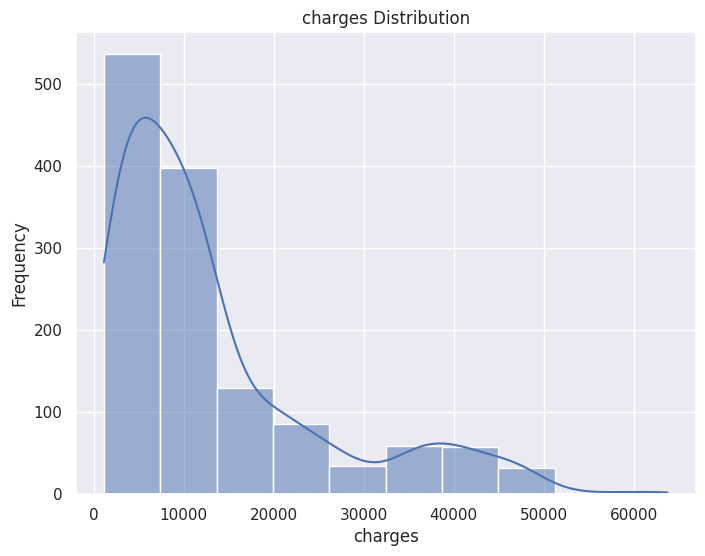

In [21]:
# Creating a histogram to visualize the distribution of 'charges' data
sns.histplot(expenses_data['charges'], bins=10, kde=True)

# Adding title and labels to the plot
plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency')

plt.show()

> **Insight:**
>
> More than 80% charges are less than 20K. Only a small fraction has higher than 20k charges.

#### **Children Distribution**

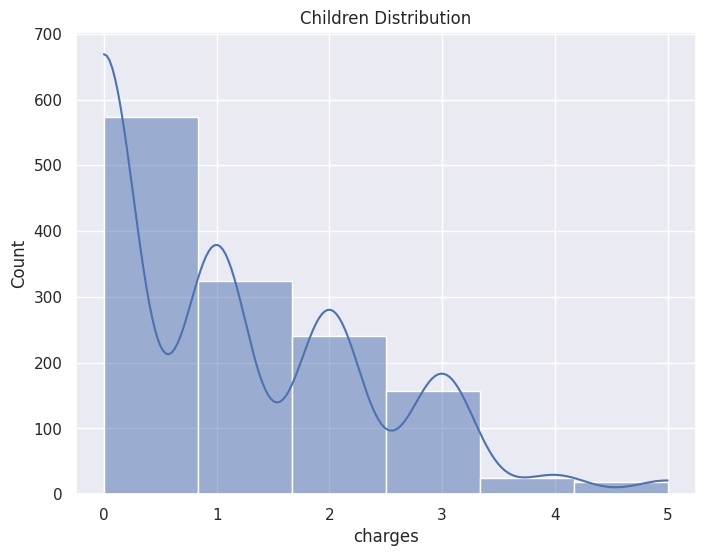

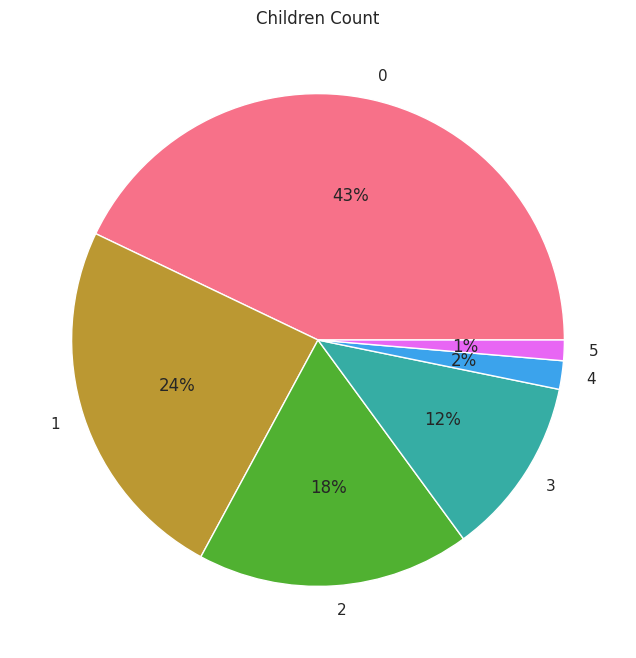

In [9]:
# Creating a histogram to visualize the distribution of 'children' data
sns.histplot(expenses_data['children'], bins=6, kde=True)

# Adding title and labels to the plot
plt.title('Children Distribution')
plt.xlabel('charges')
plt.ylabel('Count')

plt.show()

##PIE
# Extracting the count of number of children values
count = expenses_data["children"].value_counts()

# Setting labels
labels = [0, 1, 2, 3, 4, 5]

# seaborn's color palette for the pie chart
colors = sns.color_palette('husl')[0:6]

# pie chart
plt.figure(figsize=(8, 8))

# Plotting the pie chart with count values, labels, and colors
plt.pie(count, labels=labels, colors=colors, autopct='%.0f%%')

# title
plt.title("Children Count")

# Displaying Pie
plt.show()

> **Insight:**
>
> It seems majority of the customers has have 0 or 1 children

#### **Smoker, Gender, and Region Distribtion**

sex
male      676
female    662
Name: sex, dtype: int64
******************************
smoker
no     1064
yes     274
Name: smoker, dtype: int64
******************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
******************************


<Figure size 800x600 with 0 Axes>

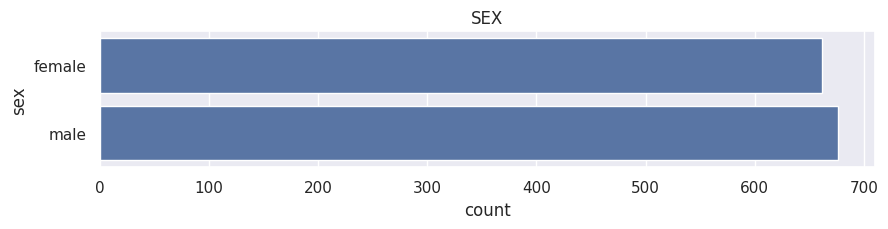

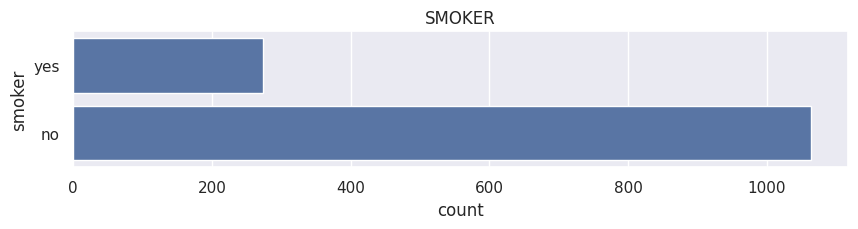

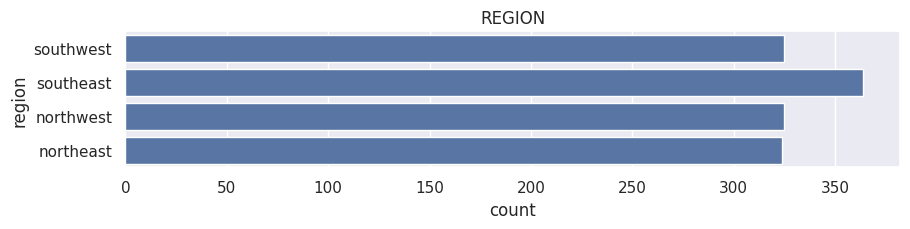

In [10]:
#Distribution of Each Variable - Exploaring Categorical Data

# Extracting column names of object type (categorical columns)
categorical_columns = expenses_data.select_dtypes("object").columns

# Looping through each categorical column and printing value counts
for i in categorical_columns:
    print(i)
    print(expenses_data[i].value_counts())
    print("*" * 30)


# Creating a figure for the entire visualization
plt.suptitle("Visualizing the counts of categorical columns", fontsize=18)

# Looping through each categorical column to create individual count plots
for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(3, 1, i+1)

    # Using seaborn's countplot to visualize the distribution of each unique value
    sns.countplot(expenses_data[col], ax=ax)

    #  title for the subplot
    ax.set_title(col.upper())

    plt.show()

> **Insight:**
>
> **Sex->**
>
> The dataset is nearly balanced in terms of gender, with a slightly higher number of males.

> **Smoker->**
>
> A significant majority of individuals in the dataset are non-smokers, with only a smaller portion identified as smokers.

> **Region->**
>
> The dataset includes individuals from various regions, with Southeast having the highest representation.

### **Bivariate analysis (relationship between each predictor and  insurance charges)**


#### **Sex, Smoking Status and Region vs Charges**

*   Sex Vs Charges
*   Smoking Vs Charges
*   Region Vs Charges



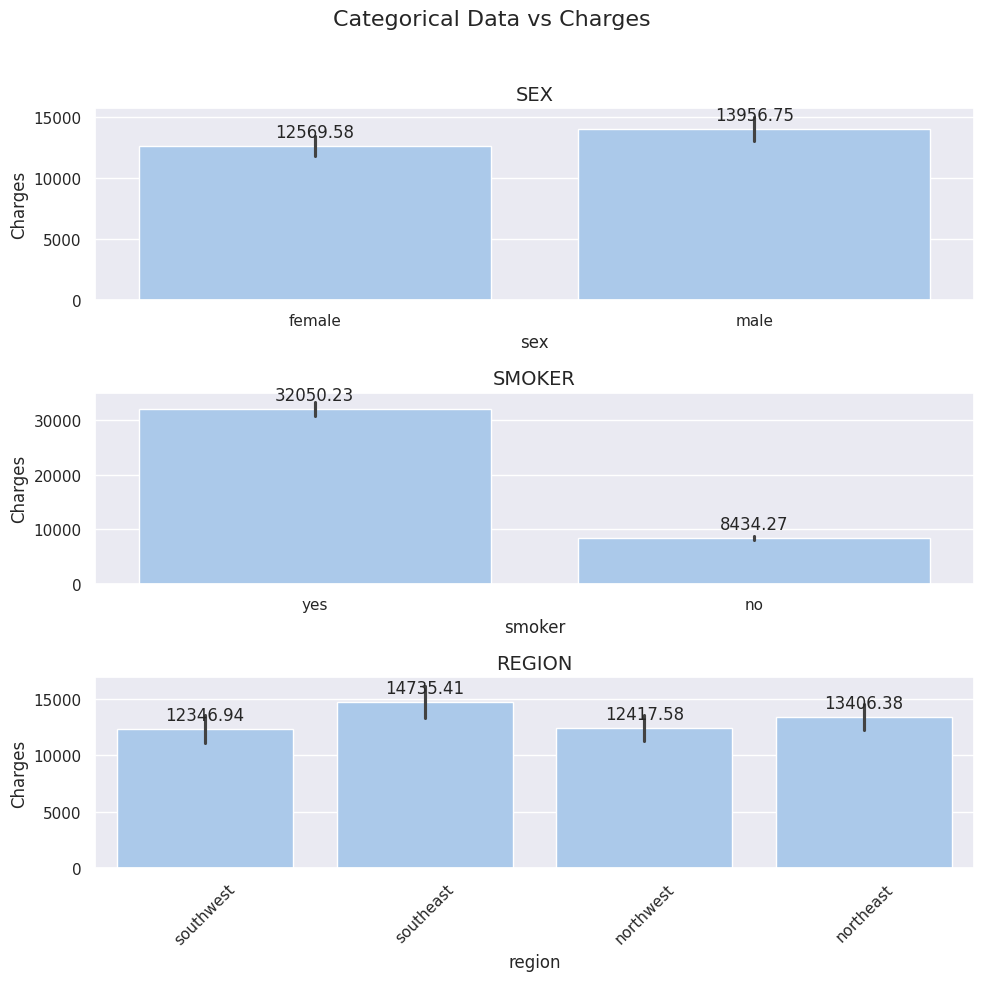

In [11]:
# color palette
sns.set_palette("pastel")

# defining figure
plt.figure(figsize=(10, 10))
plt.suptitle("Categorical Data vs Charges", fontsize=16)

# Loop to create individual bar plots
for i, col in enumerate(categorical_columns):
    ax = plt.subplot(3, 1, i + 1)

    # Using seaborn's barplot to visualize the relationship between categorical data and charges
    sns.barplot(x=col, y='charges', data=expenses_data, ax=ax)

    # Setting title for the subplot
    ax.set_title(col.upper(), fontsize=14)

    # Adding y-axis label
    ax.set_ylabel('Charges')

    # Add annotations to display exact values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure subplot titles are visible
plt.show()


**Gender Impact:**
   - Males incur higher average medical costs (13956) compared to females (12569).

**Smoking Influence:**
   - Smokers face significantly higher average charges (32050) compared to non-smokers (8434).

**Regional Variances:**
   - Residents in the southeast region experience the highest average costs (14735), notably surpassing other regions (Southwest: 12346, Northwest: 12417, Northeast: 13404).

> **Insight:**
>
> **Gender Disparity:**
   - Possible factors contributing to higher medical costs for males could include higher prevalence of certain health conditions or differences in healthcare-seeking behavior.

> **Smoking Impact:**
   - Smoking is a known risk factor for various health issues, leading to increased medical costs. Smokers may require more intensive and costly healthcare interventions.

> **Regional Disparities:**
   - The southeast region may face specific health challenges or higher healthcare costs.

#### **Age, BMI vs Charges**
*   Age Vs Charges
*   BMI Vs Charges

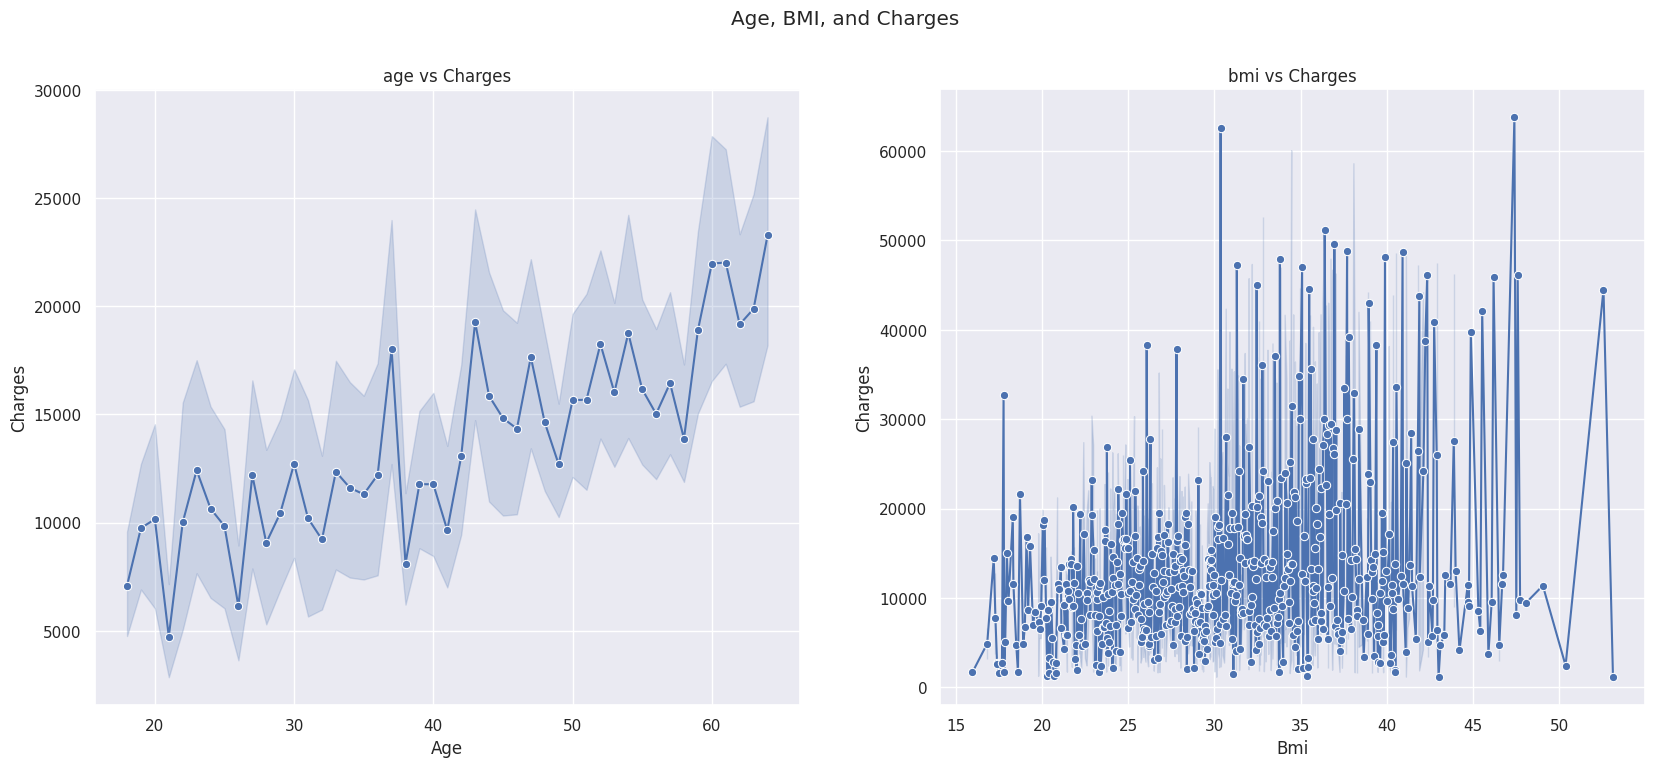

In [11]:
# defining figure
plt.figure(figsize=(20, 8))
plt.suptitle("Age, BMI, and Charges")

# Specifying continuous columns for the line plots
continuous = ['age', 'bmi']

# Looping through each continuous column to create individual line plots
for i, col in enumerate(continuous):
    ax = plt.subplot(1, 2, i + 1)

    # Using seaborn's lineplot to visualize the relationship between age/bmi and 'charges'
    sns.lineplot(x=expenses_data[col], y=expenses_data['charges'], marker='o',  ax=ax)

    # Adding title and labels
    ax.set_title(col + " vs Charges")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Charges")

# Display
plt.show()



There seems to be direct relationship of age with charges, as age is increasing charges are increasing with some exceptions only.
while BMI has no positive relationship it has increasing and decreasing impact as bmi is increasing.

> **Insight:**
>
> When people get older, their health tends to decline, so it makes sense that insurance charges go up with age

#### **Number of Children vs Charges**

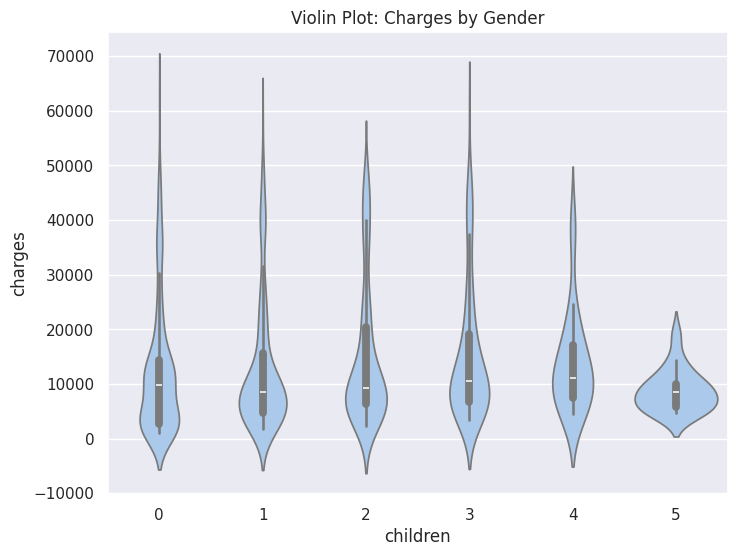

In [13]:
sns.violinplot(x='children', y='charges', data=expenses_data)
plt.title('Violin Plot: Charges by Gender')
plt.show()


> **Insight:**
>
> These variables don't show a clear trend, but something interesting pops up. Customers with five children consistently have charges in a tight range of 0 to 20,000, Meanwhile, the majority of customers, regardless of the number of children (or none at all), also fall within the 0-20,000$ charges bracket.

#### **Corelation Matrix**

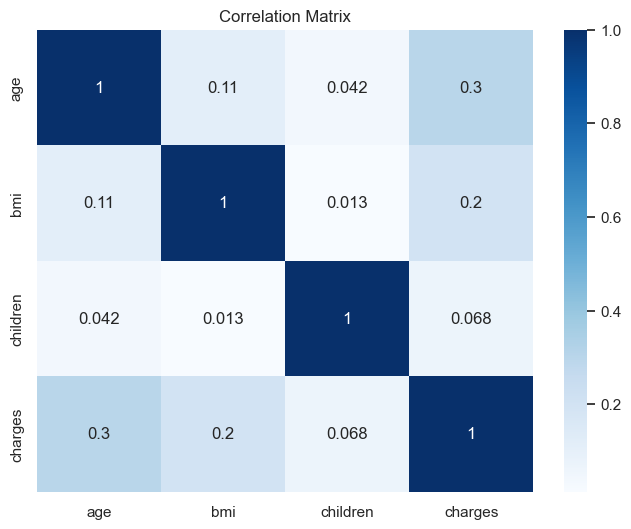

In [6]:

sns.heatmap(expenses_data.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

> **Insight:**
>
> There is a moderate positive correlation (0.3) between age and charges. As age increases, charges tend to increase, suggesting that older individuals generally incur higher medical expenses.

> There is a positive correlation (0.2) between BMI and charges. This implies that higher BMI is associated with higher medical charges, though the relationship is not as strong as age.


### **Multivariate analysis (interactions between variables)**

#### **bmi vs charges by Sex**



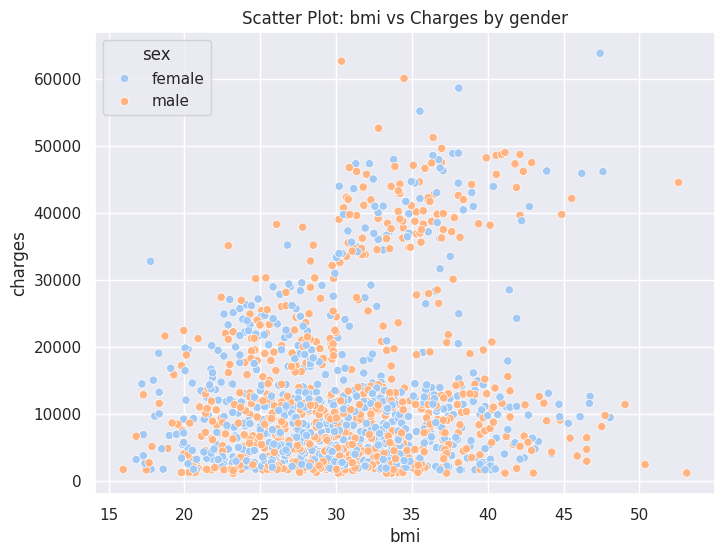

In [15]:
sns.scatterplot(x='bmi', y='charges', hue='sex', data=expenses_data)
plt.title('Scatter Plot: bmi vs Charges by gender')
plt.show()

> **Insight:**
>
> Both genders exhibit a nearly identical distribution across various BMI values, suggesting that, within this dataset, gender does not significantly influence the medical expenses incurred in relation to BMI.
> Mostly data falls below 30k$.

#### **bmi vs charges by smoker status**

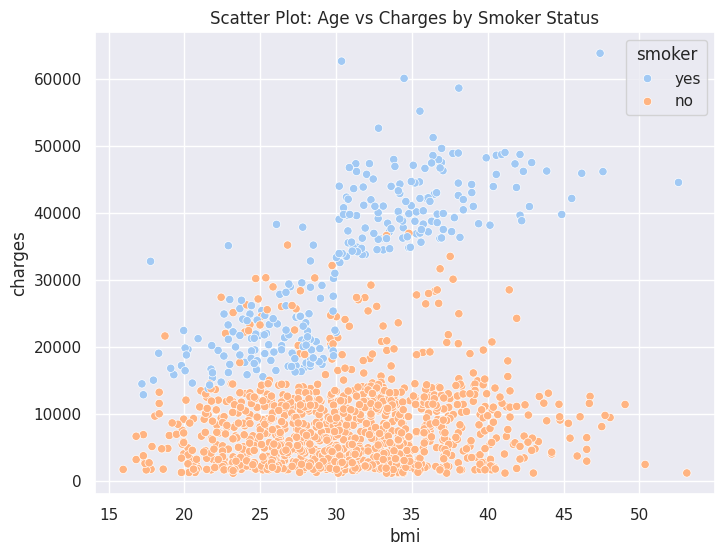

In [16]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=expenses_data)
plt.title('Scatter Plot: Age vs Charges by Smoker Status')
plt.show()

> **Insight:**
>
>  Smokers exhibit noticeably higher charges, frequently surpassing the 30,000$ threshold, while non-smokers tend to cluster below this mark. As, discussed earlier, this seems to be effect of smokers but not bmi.

#### **age vs charges by sex**

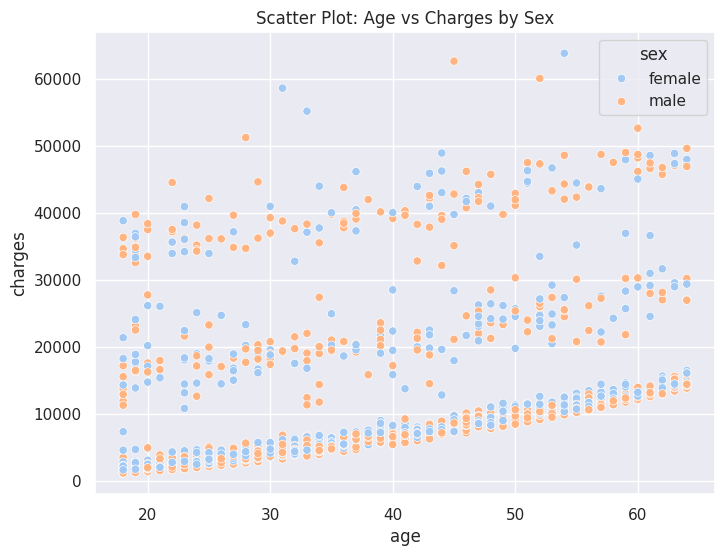

In [17]:
sns.scatterplot(x='age', y='charges', hue='sex', data=expenses_data)
plt.title('Scatter Plot: Age vs Charges by Sex')
plt.show()

> **Insight:**
>
> There isn't a big difference between males and females - their charges look pretty similar. But as people get older, their charges go up. So, age seems to be the main factor regardless of gender.

#### **age vs charges by smoker status**

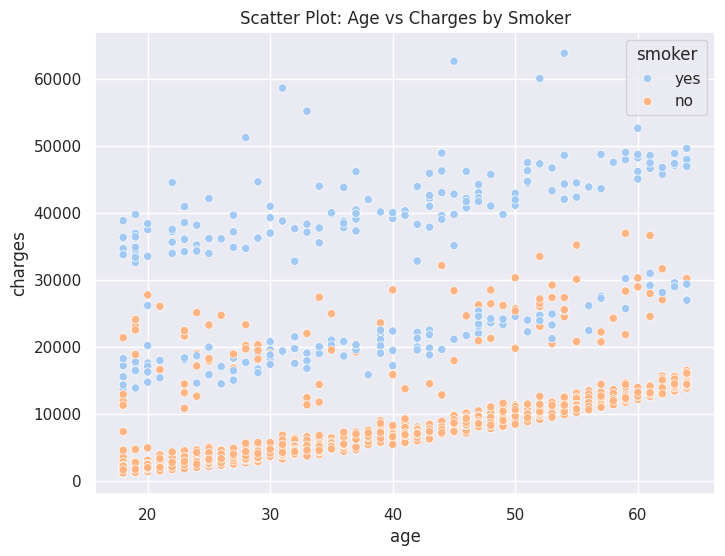

In [18]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=expenses_data)
plt.title('Scatter Plot: Age vs Charges by Smoker')
plt.show()

> **Insight:**
>
> There's a visible difference in charges between smokers and non-smokers. While both groups see their charges go up with age, smokers consistently face higher medical expenses compared to non-smokers. As discussed smokers tend to higher health risks.

#### **Cross-tabulation of smoker counts based on gender**

        Non Smoker  Smoker
Female         547     115
Male           517     159


<Axes: >

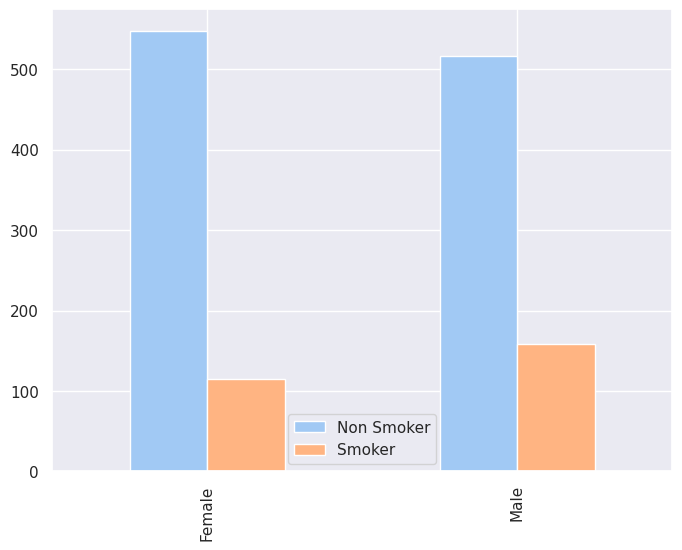

In [19]:
# Creating a cross-tabulation of smoker counts based on gender
smo_sex = pd.crosstab(index=expenses_data["sex"], columns=expenses_data["smoker"])

#index and column renaming
smo_sex.index = ['Female', 'Male']
smo_sex.columns = ['Non Smoker', 'Smoker']

# Printing the cross-tabulation
print(smo_sex)

# Visualizing the results using a bar plot
smo_sex.plot(kind='bar')

> **Insight:**
>
> it shows more females (547) are non-smokers compared to smokers (115). Similarly, for males, there are more non-smokers (517) than smokers (159). Overall, the majority of individuals, regardless of gender, are non-smokers.

#### **cross-tabulation of smoker counts based on gender and region**

smoker        no                                     yes                      \
region northeast northwest southeast southwest northeast northwest southeast   
Female       132       135       139       141        29        29        36   
Male         125       132       134       126        38        29        55   

smoker            
region southwest  
Female        21  
Male          37  


<Axes: >

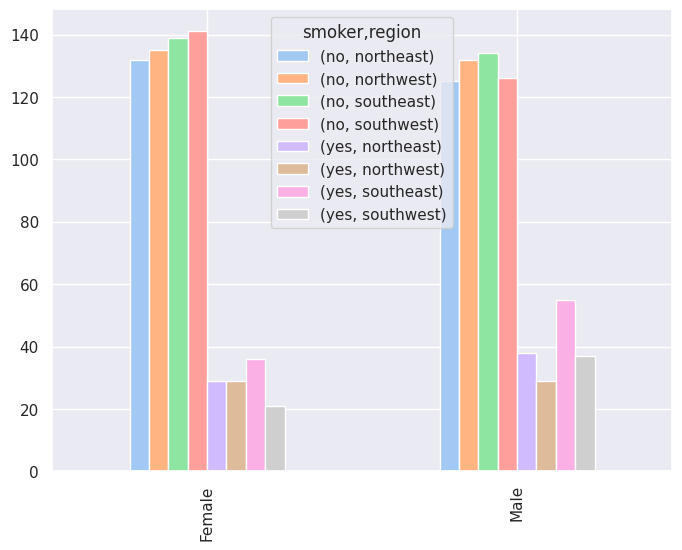

In [20]:
# Creating a cross-tabulation of smoker counts based on gender and region
smo_sex_region = pd.crosstab(index=expenses_data.sex, columns=[expenses_data.smoker, expenses_data.region])


smo_sex_region.index = ['Female', 'Male']

# Printing the cross-tabulation
print(smo_sex_region)

# Visualizing the results using a bar plot
smo_sex_region.plot(kind='bar')

> **Insight:**
>
> Result shows non-smokers outnumber smokers across different regions for both females and males. Notably, the 'Southeast' region stands out with a high proportion of male smokers

## **Model Development**


### **Mapping/Encoding Data**

In [22]:
# Mapping 'sex' column: 'female' to 0, 'male' to 1
expenses_data['sex'] = expenses_data['sex'].map({'female': 0, 'male': 1})

# Mapping 'smoker' column: 'no' to 0, 'yes' to 1
expenses_data['smoker'] = expenses_data['smoker'].map({'no': 0, 'yes': 1})

# Mapping 'region' column: 'northeast' to 1, 'northwest' to 2, 'southeast' to 3, 'southwest' to 4
expenses_data['region'] = expenses_data['region'].map({'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4})

# Displaying the first few rows of the updated DataFrame
expenses_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [26]:
# Checking the overall structure and information about the dataset after converting categorical values to numeric
expenses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


**Corelation Matrix after Data Mapping/Encoding**

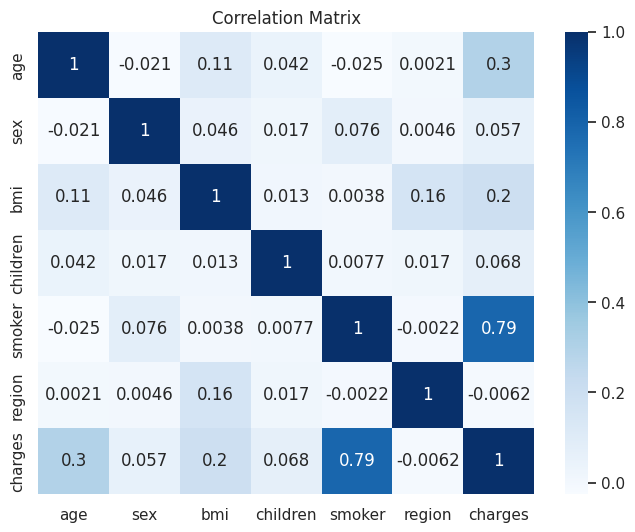

In [27]:
sns.heatmap(expenses_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

### **Linear Regression Model**

**Extracting Features**

In [23]:
# Extracting features by dropping the 'charges' column in the 'expenses_data' DataFrame
features = expenses_data.drop('charges', axis=1)

# Extracting the target variable 'charges'
target = expenses_data['charges']

we're preparing the data for modeling. We're separating the features, which are all the columns except for 'charges'. The features are stored in the 'features' DataFrame. Meanwhile, the 'charges' column is extracted as the target variable and stored separately in the 'target' Series. This separation allows us to train a machine learning model to predict the insurance charges based on other features.

**Splitting Training and Testing Data**

In [24]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15)

# Displaying the shapes of the resulting sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1137, 6)
Shape of x_test: (201, 6)
Shape of y_train: (1137,)
Shape of y_test: (201,)


We split the dataset into training and testing sets, with 85% for training and 15% for testing.

**Model Deployment**

LinearRegression()


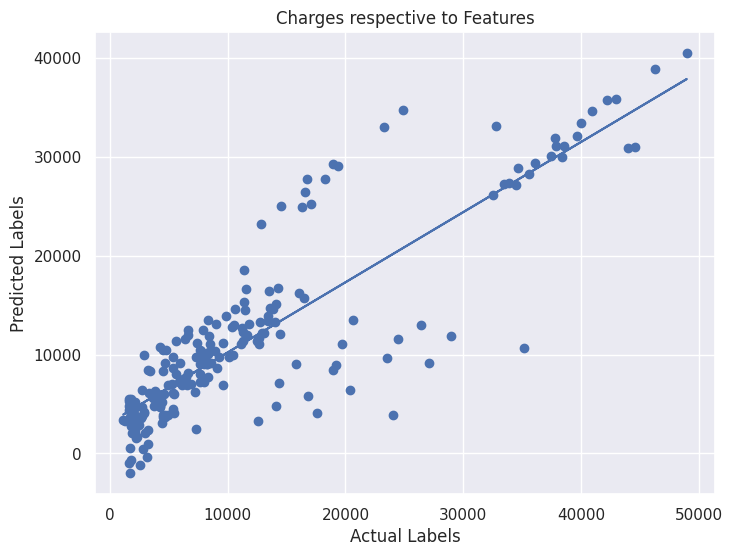

In [26]:
# features
numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Creating a Linear Regression model and fitting it to the training data
model = LinearRegression().fit(numeric_features, target)
print(model)

# Predicting the target variable for the test data
predictions = model.predict(x_test[numeric_features.columns])

# Rest of the plotting code remains the same
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Charges respective to Features')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test))
plt.show()



we're utilizing numerical features for our Linear Regression model. We fit the model to the training data and make predictions for the test data. The scatter plot visualizes the relationship between actual and predicted charges. The fitted line represents the trend in the predictions.

**Model Interpretation**

In [27]:
# coefficients and intercept of the linear regression model
print(numeric_features.columns)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Coefficients: [  257.28807486  -131.11057962   332.57013224   479.36939355
 23820.43412267  -353.64001656]
Intercept: -11461.81230467253


> **Insights:**
>
>

- **Age Coefficient (257.29):** Each year increase in age is associated with an approximate increase of $257.29 in predicted medical charges, considering other variables constant.

- **Sex Coefficient (-131.11):** Being male is associated with a decrease in predicted charges by around $131.11 compared to being female, when other variables are constant.

- **BMI Coefficient (332.57):** Each unit increase in BMI leads to an increase of approximately $332.57 in predicted charges, all other factors held constant.

- **Children Coefficient (479.37):** Having one more child is associated with an increase of about $479.37 in predicted charges, controlling for other variables.

- **Smoker Coefficient (23820.43):** Being a smoker (if encoded as 1) is linked with a significant increase in predicted charges by approximately $23820.43 compared to being a non-smoker (if encoded as 0), holding other variables constant.

- **Region Coefficient (-353.64):** Residing in certain regions (relative to a reference region) is associated with a decrease in predicted charges by roughly $353.64, assuming other variables are constant.

- **Intercept (-11461.81):** This represents the predicted charges when all other predictors are zero. However, the practical interpretation of this intercept might not be meaningful given the nature of the variables in the model.

**Model Evaluation**

In [32]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 31782606.876982015
RMSE: 5637.606484757695
R2: 0.7747883181022052


> **Insight:**
>
>
- **Mean Squared Error (MSE):** With a MSE of approximately 35,893,380.74, the model's average squared difference between actual and predicted charges is quite large. This suggests that, on average, the model's predictions deviate significantly from the actual charges.

- **Root Mean Squared Error (RMSE):** The RMSE of approximately 5,991.11 indicates the average magnitude of error in predicting charges. This value suggests that, on average, the model's predictions are off by around $5,991.11 from the actual charges.

- **R-squared (R2):** The R-squared value of approximately 0.755 indicates that approximately 75.5% of the variance in charges is explained by the features included in the model. This suggests that the model explains a substantial portion of the variability in charges.